<a href="https://colab.research.google.com/github/JacobGeorge761/TensorFlowGoogleColab/blob/main/NeuralNetworkClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification with Tensorflow

A few types of classification problems:

* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Create data to view and fit

In [1]:
from sklearn.datasets import make_circles
#make 1000 examples
n_samples = 1000

#create circles
X,y = make_circles(n_samples, noise=.03, random_state=42)

In [2]:
#lets look at the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#lets look at labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is hard to understand. Lets visualize it

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


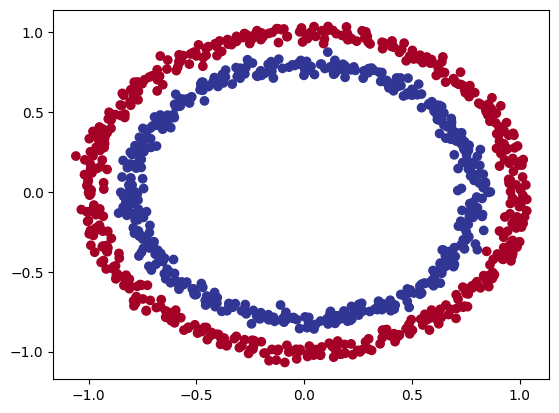

In [5]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

# Input and Output shapes

In [6]:
# check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# how many samples we are working with
len(X), len(y)

(1000, 1000)

In [8]:
# view one example of our features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

## Steps in modeling

create, compile, fit, eval, tweak, eval, tweak....

In [9]:
import tensorflow as tf

In [10]:
tf.random.set_seed(42)

# create a model using the sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#fit the model
model_1.fit(X,y,epochs=5)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4911 - loss: 5.0245
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5004 - loss: 2.4822
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5114 - loss: 0.7236
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5113 - loss: 0.6998
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5099 - loss: 0.6944


In [11]:
#lets try to imporve our model
model_1.fit(X,y,epochs=200, verbose=0)
model_1.evaluate(X,y)### NEVER DO THIS!!!

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

With this being a binary classification problem, almost 50% accuracy is basically guessing.

Lets add another layer a nd see what happens

In [12]:
tf.random.set_seed(42)

# create a model using the sequential API
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [13]:
# evaluate model
model_2.evaluate(X,y)# Never evaluate on the same data you trained on

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4955 - loss: 0.6935


[0.6932802200317383, 0.5]

# Improve our model

1. Create a model - add more layers or add mre neurons in a layer

2. compiling a model - choose a different optimizer

3. fitting a model - fit our model for more epochs

In [14]:
tf.random.set_seed(42)

# create a model using the sequential API (this time with 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), #add 100 dense neurons
  tf.keras.layers.Dense(10), #add 10 dense neurons
  tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),#change to Adam
                metrics=["accuracy"])

#fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [15]:
#evaluate the model
model_3.evaluate(X,y)
# our accuracy is STILL only as good as guessing

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5042 - loss: 0.6917


[0.6943688988685608, 0.4869999885559082]

# Visualize, visulaize, visualize

To see what is going on we sill create a function called plot_decision_boundary. This function will:

* take a trained model, featues (X) and lebales (y)

* create a meshgrid of the different X values

* make predictions across the meshgrid

* plot the predictions as well as a line between the different zones (where each unique class falls)

In [16]:
import numpy as np

In [17]:
#lets visualize what is going on by creating a function
def plot_decision_boundary(model, X, y):
  """
  plots the decision boundary created by a model predicting on X
  """
  #define axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

  # create X value (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

  # make predictions
  y_pred = model.predict(x_in)

  #check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # we need to reshape our predictions to get the ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  # plot the scatterplot
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



In [18]:
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  x_min, x_max, y_min, y_max

(np.float64(-1.1595024599098636),
 np.float64(1.1337117525463374),
 np.float64(-1.1677683182718437),
 np.float64(1.1360036756154805))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


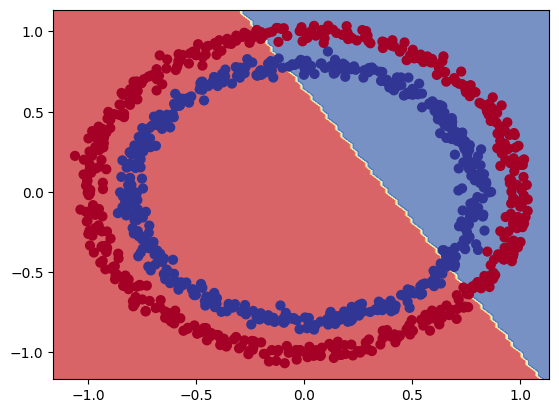

In [19]:
#check the predictions our model is making
plot_decision_boundary(model_3, X, y)

# since our model is drawing a straight line, lets see if it can be adapted for a regression problem

In [20]:
tf.random.set_seed(42)

#create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Reshape X_regression to have a second dimension
X_regression = tf.reshape(X_regression, shape=(-1, 1))

X_regression, y_regression

(<tf.Tensor: shape=(200, 1), dtype=int32, numpy=
 array([[  0],
        [  5],
        [ 10],
        [ 15],
        [ 20],
        [ 25],
        [ 30],
        [ 35],
        [ 40],
        [ 45],
        [ 50],
        [ 55],
        [ 60],
        [ 65],
        [ 70],
        [ 75],
        [ 80],
        [ 85],
        [ 90],
        [ 95],
        [100],
        [105],
        [110],
        [115],
        [120],
        [125],
        [130],
        [135],
        [140],
        [145],
        [150],
        [155],
        [160],
        [165],
        [170],
        [175],
        [180],
        [185],
        [190],
        [195],
        [200],
        [205],
        [210],
        [215],
        [220],
        [225],
        [230],
        [235],
        [240],
        [245],
        [250],
        [255],
        [260],
        [265],
        [270],
        [275],
        [280],
        [285],
        [290],
        [295],
        [300],
        [305],
        [310],
      

Since we compiled our model for binary classification, we cant use the model as is since the new data is regression

In [21]:
#split our data into train and test
X_reg_train = X_regression[:150]
y_reg_train = y_regression[:150]

X_reg_test = X_regression[150:]
y_reg_test = y_regression[150:]

# # fit our model to the regression data
# model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

In [22]:
tf.random.set_seed(42)

# create a model using the sequential API (this time with 3 layers)
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), #add 100 dense neurons
  tf.keras.layers.Dense(10), #add 10 dense neurons
  tf.keras.layers.Dense(1)
])

# compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),#change to Adam
                metrics=["mae"])

#fit the model
model_4.fit(X_reg_train,y_reg_train,epochs=100,verbose=0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


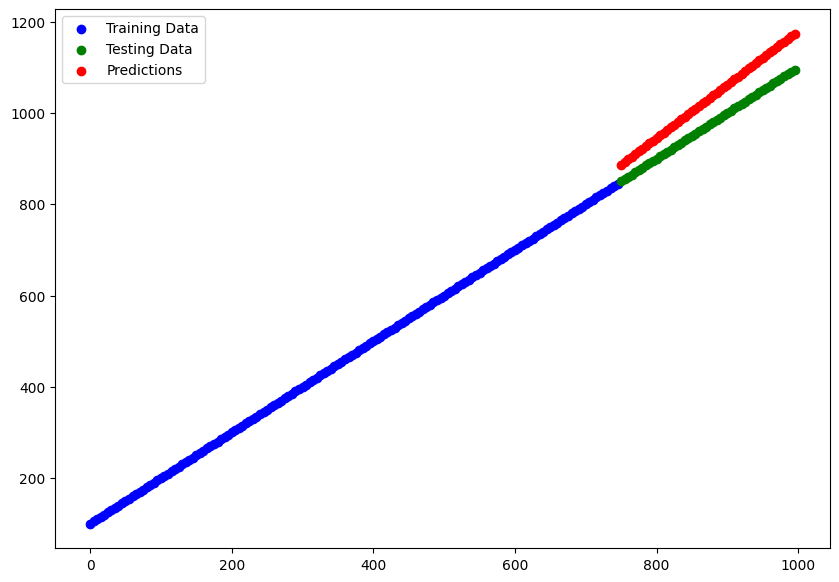

In [23]:
# make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

#plot the models predictions against the truth
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()
plt.show()

This shows that our model is learning something but it is also missing something that makes it useable for classification.

# The missing peice is non linearity

In [24]:
# set the random seed
tf.random.set_seed(42)

#create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

#compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=["accuracy"])

#fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4729 - loss: 6.6636
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4729 - loss: 6.6506
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4759 - loss: 6.6394
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4759 - loss: 6.6375
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4759 - loss: 6.6360
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4759 - loss: 6.6346
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4729 - loss: 6.6334
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4729 - loss: 6.6322
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4729 - loss: 6.6310
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4729 - loss: 6.6220
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4739 - loss: 6.6207
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

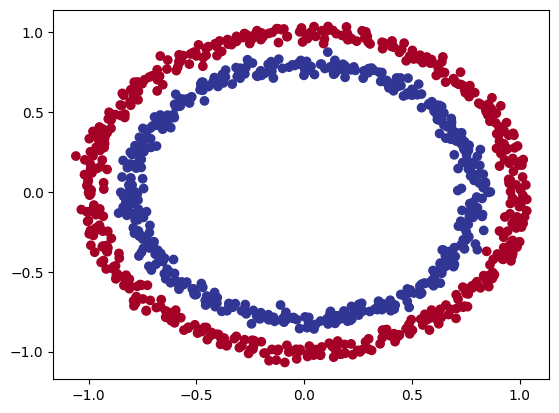

In [25]:
# check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Doing binary classification


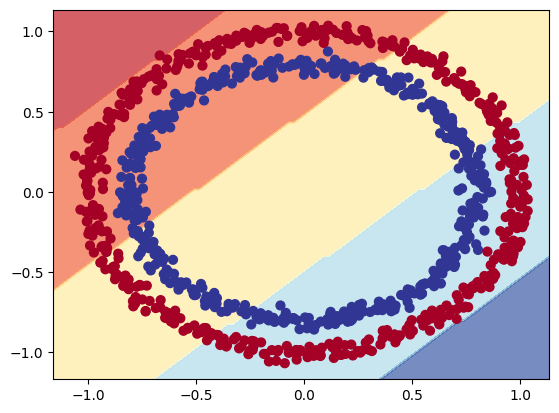

In [26]:
#check the decision boundary for our latest model
plot_decision_boundary(model_5, X, y)

Lets try to build our first neural network with a non linear activation function

In [27]:
tf.random.set_seed(42)

#create model with non linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])


model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=["accuracy"])


history = model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4830 - loss: 4.7354
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 4.4688
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 4.3894
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 4.1484
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 3.9742
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 3.7907
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 3.5654
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 3.0890
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 2.0771
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 1.1787
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4830 - loss: 1.1418
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

Lets try the same non linear activation function again but this time add more layers and neurons

In [28]:
tf.random.set_seed(42)

#create model with non linear activation but lets add an extra layer with a few more neurons
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])


model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=["accuracy"])


history = model_7.fit(X,y,epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4587 - loss: 5.3406
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4543 - loss: 4.6058
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4243 - loss: 3.7145
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4013 - loss: 3.2251
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4272 - loss: 2.5962
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4458 - loss: 1.8087
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4559 - loss: 0.9852
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4547 - loss: 0.9398
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4507 - loss: 0.9125
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4505 - loss: 0.8921
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4495 - loss: 0.8753
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [29]:
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9182 - loss: 0.1926


[0.18356230854988098, 0.9229999780654907]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


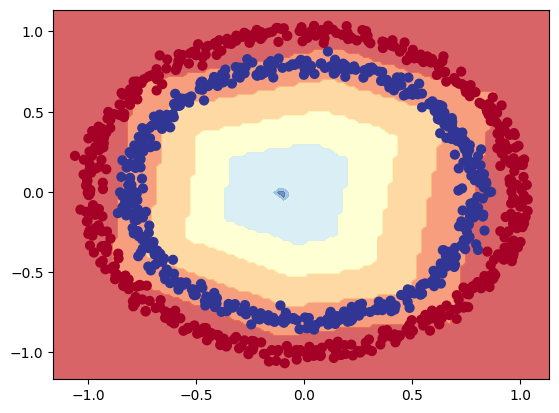

In [30]:
#how do our moddel predictions look?
plot_decision_boundary(model_7,X,y)

In [31]:
#lets build one last model but this time we will add a sigmoid activation function to the output layer

tf.random.set_seed(42)

#create model with non linear activation but lets add an extra layer with a few more neurons
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=["accuracy"])


history = model_8.fit(X,y,epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5154 - loss: 0.7137
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5112 - loss: 0.7069
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4975 - loss: 0.7035
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4563 - loss: 0.7016
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4724 - loss: 0.7004
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4509 - loss: 0.6995
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4103 - loss: 0.6987
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4417 - loss: 0.6981
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4759 - loss: 0.6975
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4933 - loss: 0.6969
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4749 - loss: 0.6964
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [32]:
#evaluate our model
model_8.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9956 - loss: 0.0838


[0.08500786125659943, 0.9929999709129333]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Doing binary classification


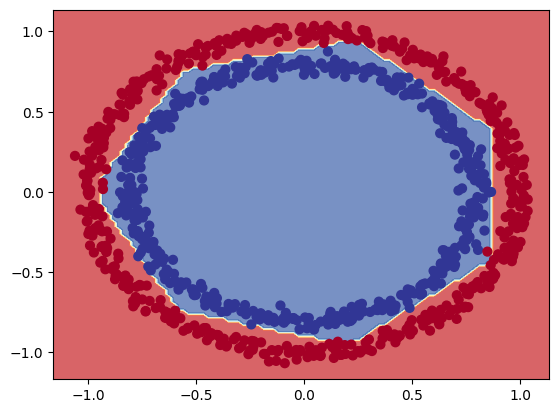

In [33]:
#lets visualize
plot_decision_boundary(model_8,X,y)

Are we really evaluating the model correctly?

What data did the model learn on and what data did we predict on?

**The combination of linear and non linear functions is one of the key fundementals of neural netwroks**

Now that we have discussed the concept of linear and non-linear functions (or lines) lets see them in actions

In [34]:
# create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

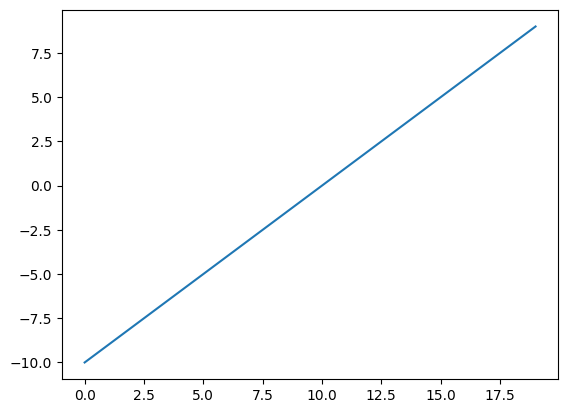

In [35]:
#visualize our toy tensor
plt.plot(A)

In [36]:
# lets start be replicating sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use our sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

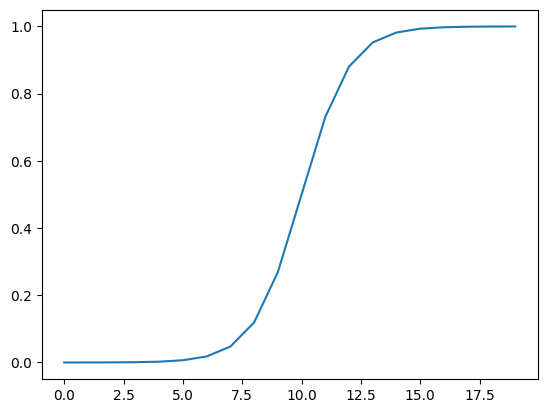

In [37]:
# plot out toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [38]:
#lets recreate the relu function
def relu(x):
  return tf.maximum(0,x)

# use our relu function on our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

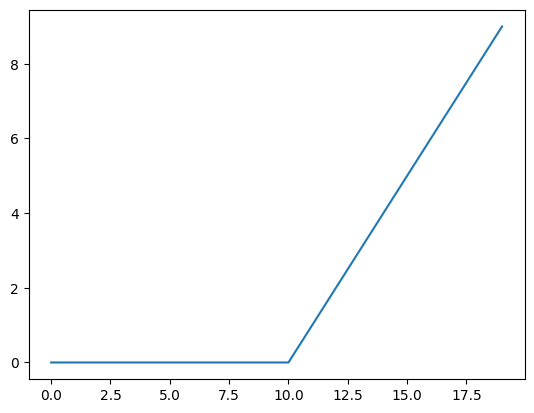

In [39]:
# plot out toy tensor transformed by relu
plt.plot(relu(A))

In [40]:
#Lets try the linear activation function
tf.keras.activations.linear(A)
# it seems like the linear activation function just gave back our original tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

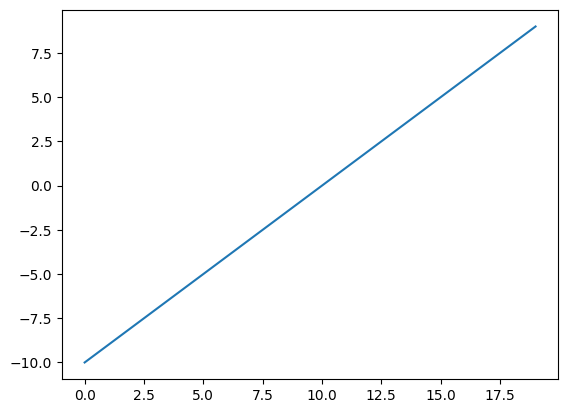

In [41]:
# does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [42]:
# Does A even change???? (Nope)
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# **These differnt linear and non linear functions give our model differnt kinds of lines to use to draw patterns around our data**

## Evaluating and improving our classification

So far we have been training and testing on the same data which is basically a sin

So lets create a training and test set and seek redemption

In [43]:
len(X)

1000

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
#split sata into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [47]:
#lets recreate model 8 with a few tweaks
tf.random.set_seed(42)

#create model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#the optimizer says "you shoud improve the model in this way"
#the learning rate says "how much our model should improve those models every opoch"
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                metrics=["accuracy"])


history = model_9.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4668 - loss: 0.6997
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4783 - loss: 0.6922
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5176 - loss: 0.6883
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5249 - loss: 0.6833
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5290 - loss: 0.6756
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5733 - loss: 0.6647 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6138 - loss: 0.6516 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6146 - loss: 0.6394 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6228 - loss: 0.6270
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6463 - loss: 0.6142
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6723 - loss: 0.5982
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7105 -

In [48]:
# evaluate the model
model_9.evaluate(X_test, y_test)
# we have got the same amount of accuracy with less epochs due to the learning rate

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9937 - loss: 0.0345  


[0.04183917120099068, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


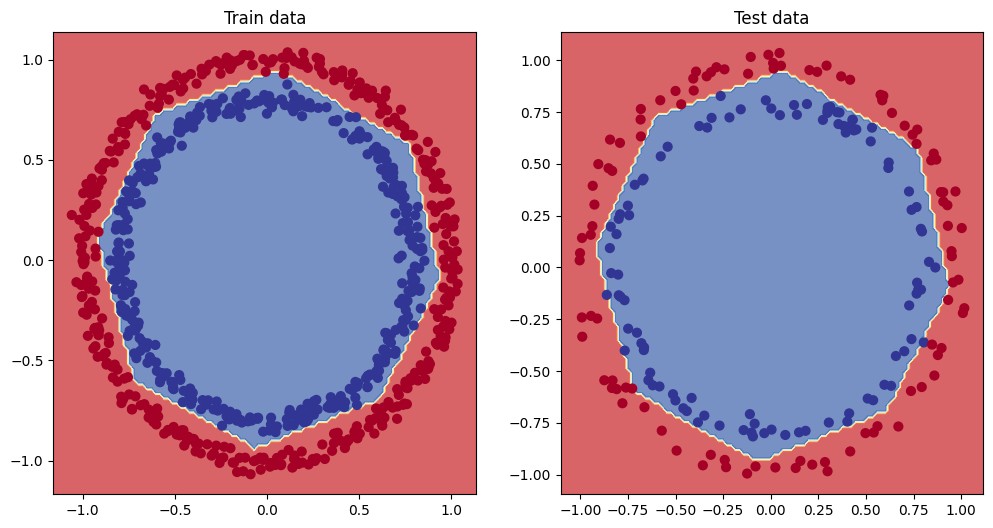

In [49]:
# plot the decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # one row two columns 1st plot
plt.title("Train data")
plot_decision_boundary(model_9, X_train, y_train)
plt.subplot(1,2,2) # one row two columns 2nd plot
plt.title("Test data")
plot_decision_boundary(model_9, X_test, y_test)

## Plot the loss (or training) curves

In [50]:
# convert the history object into a DataFrame
pd.DataFrame(history.history)

,accuracy,loss
0,0.48750,0.697551
1,0.48250,0.691725
2,0.51625,0.687542
3,0.53000,0.682069
4,0.54250,0.674326
5,0.59125,0.663349
6,0.61250,0.650988
7,0.62125,0.638724
8,0.63250,0.625463
9,0.65000,0.612189


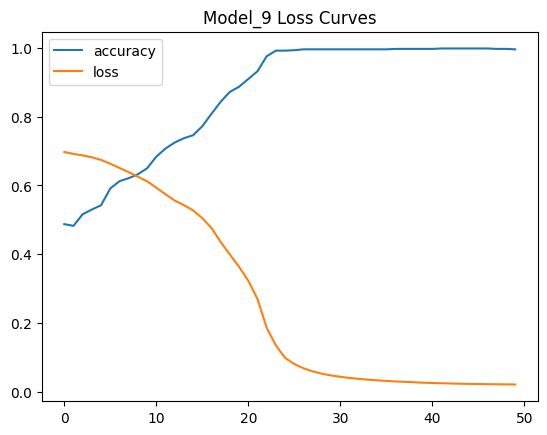

In [51]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_9 Loss Curves")
plt.show()

The loss function is how wrong our model is. The predictions its making is getting closer to the ground truth lables

For many problems, the loss function going down means our model is improving

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loass decreases th most duing training) we are going to use the following steps:

* A learning rate callback - we can think of a callback as an extra piece of functionality, we can add to our model WHILE it is training

* Another model

* A modified loss curve plot

In [52]:
# Lets try the callback

tf.random.set_seed(99)

#build the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#compile the model
model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
                 metrics = ["accuracy"])

#Create learning rate call back
#This line of code creates a learning rate schedule that dynamically adjusts the learning rate as training progresses
#On each epoch, it will set the learning rate to 1e-4 * 10^(epoch / 20)
#This causes the learning rate to increase exponentially over time
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#fit the model with the lr_schedular callback
history_10 = model_10.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5057 - loss: 0.6912 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4997 - loss: 0.6912 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4997 - loss: 0.6911 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4996 - loss: 0.6911 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4999 - loss: 0.6911 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4999 - loss: 0.6911 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5028 - loss: 0.6910 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5028 - loss: 0.6910 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5028 - loss: 0.6909 - learning_

<Axes: xlabel='Epochs'>

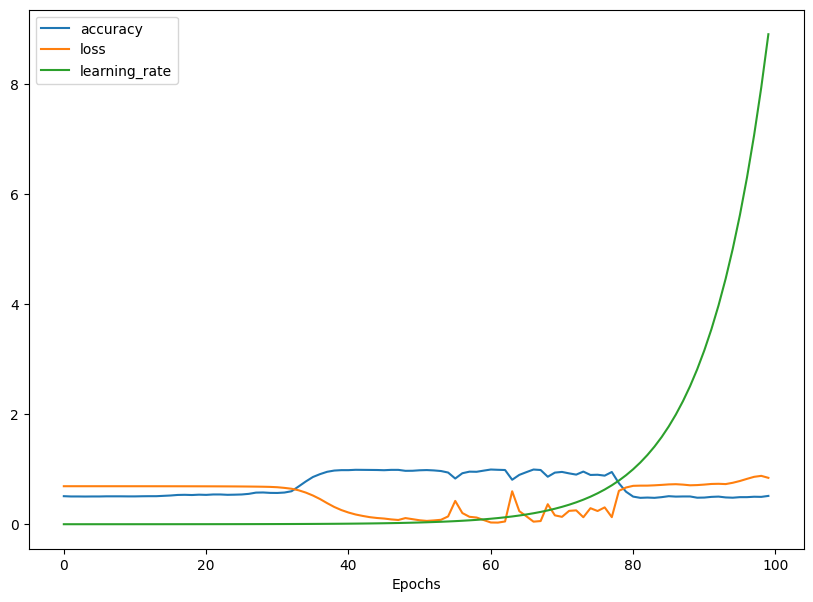

In [53]:
#lets check the history
pd.DataFrame(history_10.history).plot(figsize=(10,7), xlabel="Epochs")

Text(0.5, 1.0, 'Learning rate vs loss')

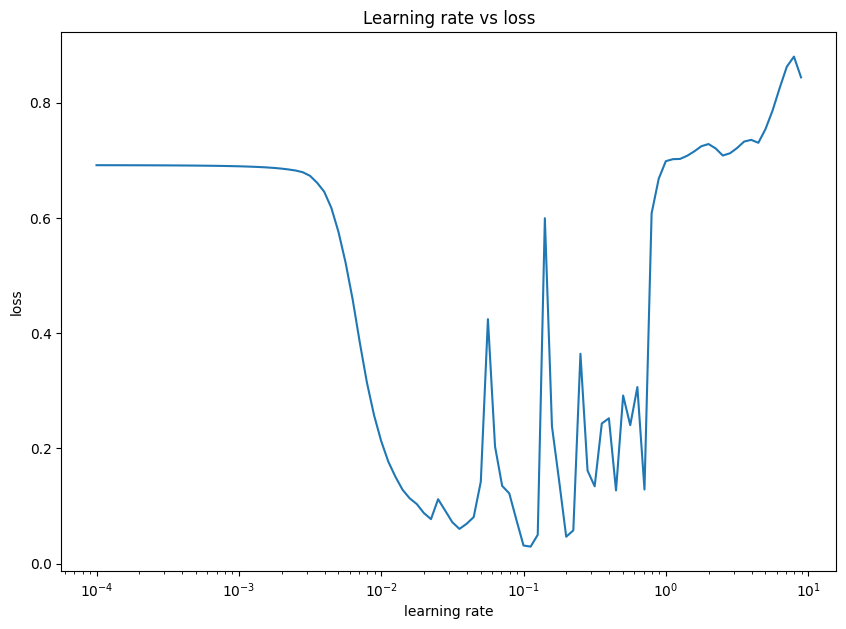

In [54]:
# plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))

plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss")


The ideal learning rate is usually between the lowest point on the curve and before that where the loss is still decreasing (the default values are pretty good usually)

In [55]:
# example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [61]:
# lets try using a higher *ideal* learnign rate with the same model as before

# Lets try the callback

tf.random.set_seed(69)

#build the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#compile the model
model_11.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = .02),#higher than last time
                 metrics = ["accuracy"])


#fit the model for 40 epochs (10 less than before)
history_11 = model_11.fit(X_train, y_train, epochs = 40)


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5301 - loss: 0.7008
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5179 - loss: 0.6892
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5601 - loss: 0.6834
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5679 - loss: 0.6752
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5550 - loss: 0.6704
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5660 - loss: 0.6602
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6108 - loss: 0.6440
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6750 - loss: 0.6133
Epoch 9/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7144 - loss: 0.5819
Epoch 10/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7403 - loss: 0.5249
Epoch 11/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8250 - loss: 0.4567
Epoch 12/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9187 - l

We see that model 11 performed slightly better than model 9 in fewer epochs because we increased the learning rate (may not ALWAYS be the case)

# NOTE THIS IS TRUE FOR THE TRAINING DATA

Let see how the modles compare on the test data

In [62]:
#evaluate model 11 or the test data
model_11.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9662 - loss: 0.0623 


[0.07295098900794983, 0.9649999737739563]

In [63]:
#evaluate model 9 on the test data
model_9.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9937 - loss: 0.0345 


[0.04183917120099068, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


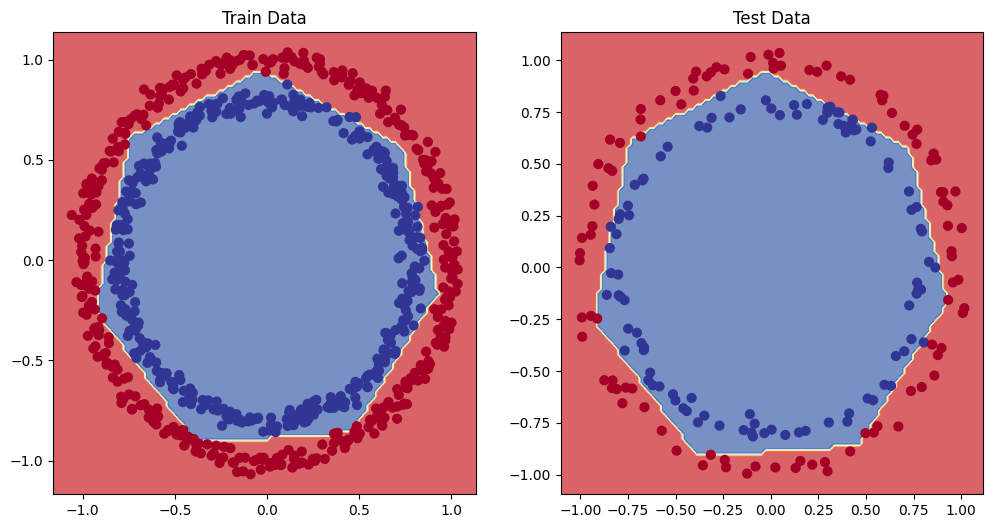

In [64]:
#plot the decision boundries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Data")
plot_decision_boundary(model_11, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test Data")
plot_decision_boundary(model_11, X_test, y_test)

## More classification eval metrics

Along with visualizing our models, we can use a handful of other metrics to evaluate our models:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from sklearn)

In [66]:
#check accuracy of model
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9662 - loss: 0.0623
Model loss on the test set: 0.07295098900794983
Model accuracy on the test set: 96.50%


Lets set up a confusion martix

In [73]:
from sklearn.metrics import confusion_matrix

#make predictions
y_preds = model_11.predict(X_test)

#create confusion matrix
try:
  confusion_matrix(y_test,y_preds)
except ValueError:
  print("ValueError: Classification metrics can't handle a mix of binary and continuous targets")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
ValueError: Classification metrics can't handle a mix of binary and continuous targets


In [68]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [71]:
y_preds[:10]

array([[9.9466461e-01],
       [9.2178456e-02],
       [9.9979037e-01],
       [1.1367367e-03],
       [9.9864024e-01],
       [7.9886478e-01],
       [1.1438313e-03],
       [7.5249489e-05],
       [9.9937552e-01],
       [1.1754161e-02]], dtype=float32)

Whoops, looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions

In [74]:
#convert prediction probabilities to binary format and view the first 10
tf.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [76]:
#lets try that again
confusion_matrix(y_test,tf.round(y_preds))

array([[96,  4],
       [ 3, 97]])

Lets make it pretty by creating a function to plot it.

Sklearn already has a plot_confusionmartix function but it only works with sklearn models.

We need to adapt it for TensorFlow

In [84]:
def plot_confusion_martix(y_test, y_preds, figsize=(10,10)):
  #lets create the function to plot the confusion matrix
  import itertools

  figsize = (10,10)

  #create a confusion matrix
  cm = confusion_matrix(y_test,tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  #create figure and axis
  fig, ax = plt.subplots(figsize=figsize)
  #create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #create classes
  classes = False
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #label axis
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #set x axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)


  #set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  #plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=15)

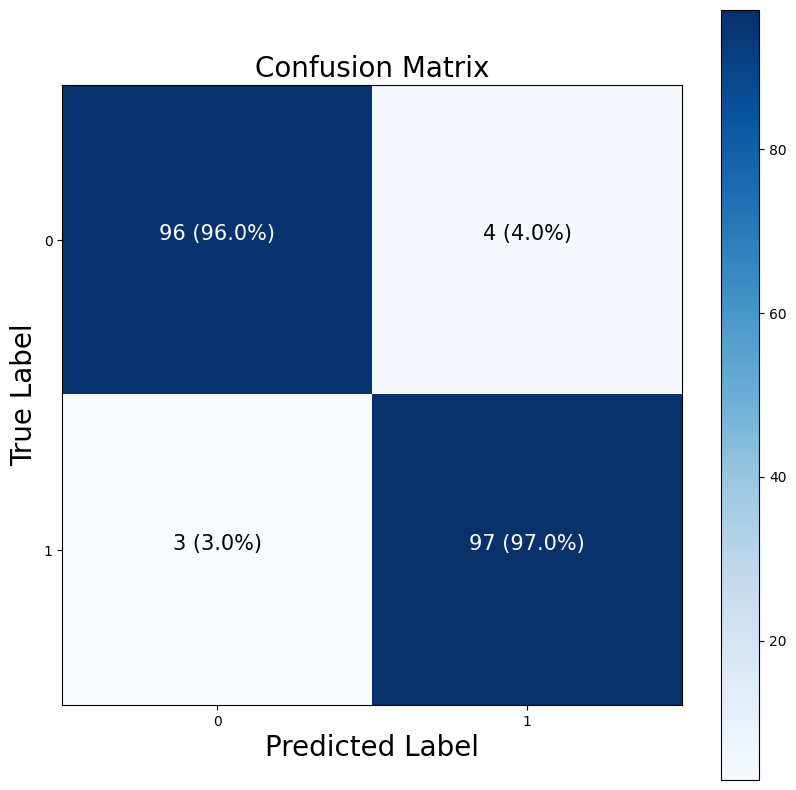

In [85]:
plot_confusion_martix(y_test, y_preds)